## Time Series Forecasting using Facebook's Prophet Library

In [4]:
# importing libraries : 

import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [5]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


The prophet library expects a DataFrame as input with one column containing time information and another column containing the metric that we wish to forecast. The time column is expected to be datetime type. So let's check the type of our columns and change it to datetime if necessary

In [6]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [7]:
# Since the month is in object we have to change it to datetime type : 
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

#### Important : Now month is in datetime 64. Prophet also makes it mandatory to name the input column as ds (the time column) and y (the metric column). So we have to rename the columns : 

In [14]:
df = df.rename(columns = {'Month' : 'ds',
                         '#Passengers' : 'y'})
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Now exploring the dataset by doing a line plot :

In [22]:
pd.plotting.register_matplotlib_converters() 
# This is done because Prophet deregisters the pandas converters in its code. The code in the line 
# above reregisters the converters that comes with register(). This problem affects Jupyter Notebook
# and Google Colab

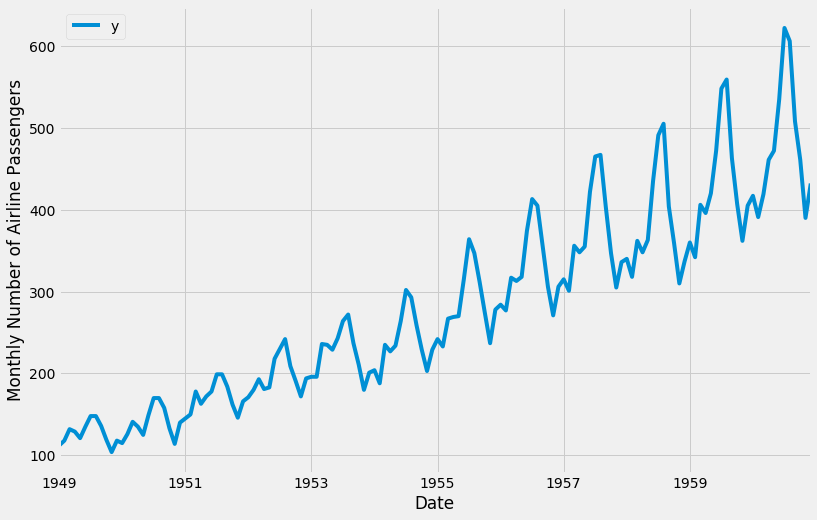

In [23]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()


The authors of Prophet have abstracted away many of the inherent complexities of time series forecasting and made it more intuitive for analysts and developers alike to work with time series data.

To begin, we must instantiate a new Prophet object. Prophet enables us to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter.

In [24]:
# The default uncertainity level of Prophet is 80%. Setting it to 95%

my_model = Prophet(interval_width = 0.95)

Now that the prophet model has been initialized we can call its fit method with our DataFrame as input. 

In [25]:
my_model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Note: In order to obtain forecasts of our time series we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions. Conveniently, we do not have to concern ourselves with manually creating this DataFrame as Prophet provides the make_future_dataframe helper function to do that

In [26]:
future_dates = my_model.make_future_dataframe(periods = 36, freq = 'MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


When working with Prophet it is important to consider the frequency of the time series. As we are working with monthly data, we clearly specified the desired frequency of our timestamps (in this case 'MS' is start of each month). Therefore, the make_future_dataframe generated 36 monthly timestamps for us. In other words, we're predicting values 3 years into the future 

In [27]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.762691,604.646146,695.235286
176,1963-09-01,602.208825,558.277727,644.855015
177,1963-10-01,566.146573,523.870570,610.096447
178,1963-11-01,534.150949,491.379570,576.676406
179,1963-12-01,563.790461,517.584250,607.895131


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:

1. ds: the datestamp of the forecasted value

2. yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)

3. yhat_lower: the lower bound of our forecasts

4. yhat_upper: the upper bound of our forecasts

In [29]:
# To view everything provided by prophet in predictions : 
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
175,1963-08-01,582.324785,604.646146,695.235286,577.990792,586.931477,67.437906,67.437906,67.437906,67.437906,67.437906,67.437906,0.0,0.0,0.0,649.762691
176,1963-09-01,585.440257,558.277727,644.855015,580.899969,590.273642,16.768568,16.768568,16.768568,16.768568,16.768568,16.768568,0.0,0.0,0.0,602.208825
177,1963-10-01,588.455230,523.870570,610.096447,583.683849,593.544266,-22.308657,-22.308657,-22.308657,-22.308657,-22.308657,-22.308657,0.0,0.0,0.0,566.146573
178,1963-11-01,591.570702,491.379570,576.676406,586.565995,596.923423,-57.419752,-57.419752,-57.419752,-57.419752,-57.419752,-57.419752,0.0,0.0,0.0,534.150949
179,1963-12-01,594.585674,517.584250,607.895131,589.391078,600.141195,-30.795214,-30.795214,-30.795214,-30.795214,-30.795214,-30.795214,0.0,0.0,0.0,563.790461


Note : A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

Prophet also provides a convenient function to quickly plot the results of our forecasts:

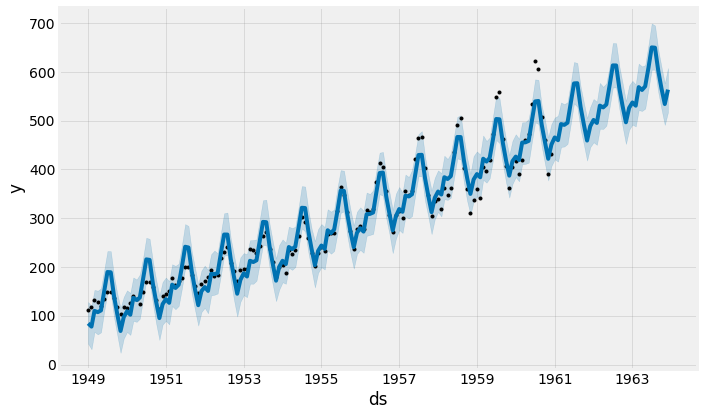

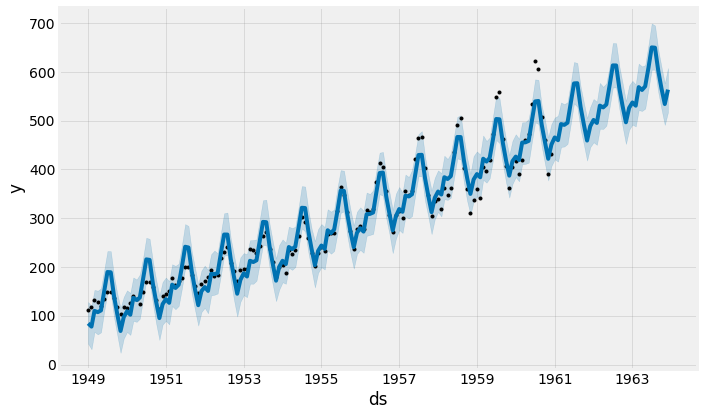

In [34]:
my_model.plot(forecast, uncertainty = True)

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

One other particularly strong feature of Prophet is its ability to return the components of our forecasts. This can help reveal how daily, weekly and yearly patterns of the time series contribute to overall forecasted values : 

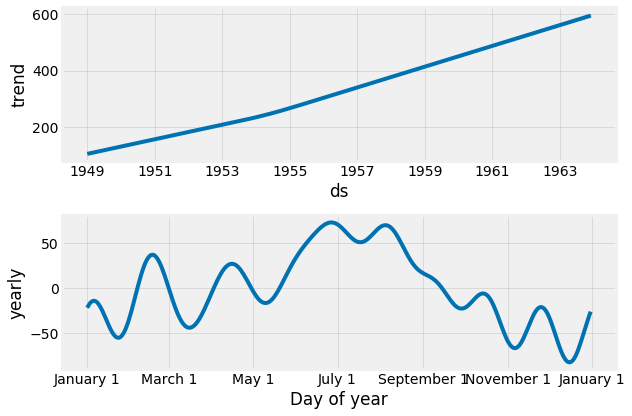

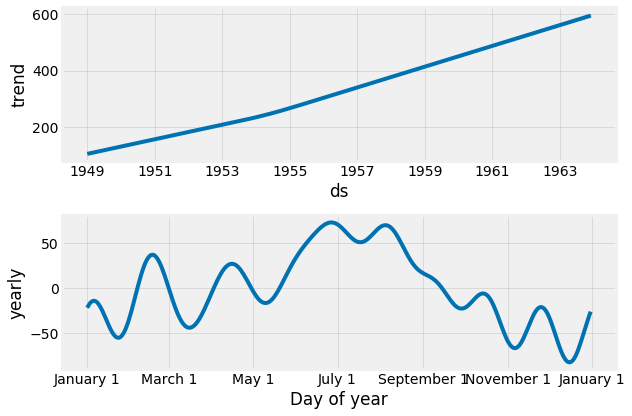

In [35]:
my_model.plot_components(forecast)